### Capstone Project - The Battle of the Neighborhoods (Week 2)(Final Week)

Applied Data Science Capstone by IBM/Coursera

Analyst: Joey Tse

### Introduction: Business Problem 

In this project we will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening a Chinese restaurant in Amsterdam, Netherlands.

Since there are lots of restaurants in Amsterdam we will try to detect locations that are not already crowded with restaurants. We are also particularly interested in areas with no Chinese restaurants in vicinity. We would also prefer locations as close to city center as possible, assuming that first two conditions are met.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

### Data 

Based on definition of our problem, factors that will influence our decission are:

- number of existing restaurants in the neighborhood (any type of restaurant)
- number of and distance to Chinese restaurants in the neighborhood, if any
- distance of neighborhood from city center

We decided to use regularly spaced grid of locations, centered around city center, to define our neighborhoods.

Following data sources will be needed to extract/generate the required information:

- centers of candidate areas will be generated algorithmically and approximate addresses of centers of those areas will be obtained using Google Maps API reverse geocoding
- number of restaurants and their type and location in every neighborhood will be obtained using Foursquare API
- coordinate of Amsterdam center will be obtained using Google Maps API geocoding of well known Amsterdam location

### Import reqired libraries

In [1]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import csv

!pip install geocoder
import geocoder # to get longitude and latitude

!conda install -c conda-forge folium=0.5.0 --yes
import folium # Map plotting library
import numpy as np
from pandas.io.json import json_normalize # Tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


In [2]:
# pip install geopy

In [3]:
from geopy.geocoders import Nominatim

In [67]:
source = requests.get('https://en.wikipedia.org/wiki/Category:Neighbourhoods_of_Amsterdam').text 
source
soup = BeautifulSoup(source, 'lxml')
soup

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Category:Neighbourhoods of Amsterdam - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"b6838abb-69a6-407e-bfd6-1fe0e15001ff","wgCSPNonce":!1,"wgCanonicalNamespace":"Category","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":14,"wgPageName":"Category:Neighbourhoods_of_Amsterdam","wgTitle":"Neighbourhoods of Amsterdam","wgCurRevisionId":645887402,"wgRevisionId":645887402,"wgArticleId":3311930,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Neighbourhoods in the Netherlands by city","Geography of Amsterdam","Boroughs of Amsterdam"],"wgPage

In [68]:
df = pd.read_csv("C:/Users/yeeyee/OneDrive/offical/2021_ Self Learning Certificate/3 IBM/C10/a.csv")
df

,A
0,Admiralenbuurt
1,Amsteldorp
2,Amsterdam Oud-West
3,Amsterdam Oud-Zuid
4,Amsterdam Science Park
5,Apollobuurt
6,Betondorp
7,Bijlmermeer
8,Binnenstad (Amsterdam)
9,Bos en Lommer


In [69]:
df = df.rename(columns={"A":"Neighborhood"})
df

,Neighborhood
0,Admiralenbuurt
1,Amsteldorp
2,Amsterdam Oud-West
3,Amsterdam Oud-Zuid
4,Amsterdam Science Park
5,Apollobuurt
6,Betondorp
7,Bijlmermeer
8,Binnenstad (Amsterdam)
9,Bos en Lommer


In [70]:
df.shape

(106, 1)

In [71]:
# Initialize varialbes
lat = []
lng = []
lat_lng_coords = None

# Get postcodes from neighbourhoods table
neighbourhoods = df['Neighborhood']

# Store latitude and longitude values in lat and lng
for nh in neighbourhoods:
    g = geocoder.arcgis('{}, Amsterdam, Netherlands'.format(nh))
    lat_lng_coords = g.latlng
    lat.append(lat_lng_coords[0])
    lng.append(lat_lng_coords[1])


In [72]:
adf = df
adf['Latitude'] = lat
adf['Longitude'] = lng
adf.head(10)

,Neighborhood,Latitude,Longitude
0,Admiralenbuurt,52.372752,4.856359
1,Amsteldorp,52.339680,4.918740
2,Amsterdam Oud-West,52.365390,4.870220
3,Amsterdam Oud-Zuid,52.352350,4.877880
4,Amsterdam Science Park,52.354300,4.958010
5,Apollobuurt,52.350294,4.867990
6,Betondorp,52.423405,4.833395
7,Bijlmermeer,52.307031,4.969744
8,Binnenstad (Amsterdam),52.369930,4.907880
9,Bos en Lommer,52.379190,4.851740


### Set up FourSquare credentials

In [121]:
CLIENT_ID = 'GYVKTJPIMG0DTEEZWFQC50SDLTHWBSU0SPQJROXTGYA5ZEW1' # your Foursquare ID
CLIENT_SECRET = 'KOMNMP5AQQNR2S1PR1BX245BINZFP4NWCYFQGGPIOYKKDO2A' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GYVKTJPIMG0DTEEZWFQC50SDLTHWBSU0SPQJROXTGYA5ZEW1
CLIENT_SECRET:KOMNMP5AQQNR2S1PR1BX245BINZFP4NWCYFQGGPIOYKKDO2A


In [122]:
# get Latitude and Longitude of Amsterdam
from geopy.geocoders import Nominatim

address = 'Amsterdam, Netherlands'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Amsterdam are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Amsterdam are 52.3727598, 4.8936041.


In [123]:
# plot the map
adf_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(adf['Latitude'], adf['Longitude'], adf['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(adf_map)  
    
adf_map

In [124]:
adf.loc[0, 'Neighborhood']

'Admiralenbuurt'

In [125]:
neighborhood_latitude = adf.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = adf.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = adf.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighbourhood_name, 
                                                               neighbourhood_latitude, 
                                                               neighbourhood_longitude))

Latitude and longitude values of Admiralenbuurt are 52.37275173538222, 4.856358900371928.


In [126]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=GYVKTJPIMG0DTEEZWFQC50SDLTHWBSU0SPQJROXTGYA5ZEW1&client_secret=KOMNMP5AQQNR2S1PR1BX245BINZFP4NWCYFQGGPIOYKKDO2A&v=20180604&ll=52.37275173538222,4.856358900371928&radius=500&limit=100'

In [127]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60abd9994fc3bf06f76cf5c3'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Stadsdeel West',
  'headerFullLocation': 'Stadsdeel West, Amsterdam',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 45,
  'suggestedBounds': {'ne': {'lat': 52.37725173988222,
    'lng': 4.863715888847818},
   'sw': {'lat': 52.368251730882214, 'lng': 4.849001911896039}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5c363b588c812a002c66f664',
       'name': 'Sapporo Ramen Sora',
       'location': {'lat': 52.371294,
        'lng': 4.855144,
        'labeledLatLngs': [{'label': 'display',
          'lat': 52.371294,
          'lng': 4.855144}],
       

In [128]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [129]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-129-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Sapporo Ramen Sora,Ramen Restaurant,52.371294,4.855144
1,Deli-caat,Deli / Bodega,52.371221,4.856056
2,Rein Cityspa,Spa,52.371217,4.855969
3,Café Cook,Pub,52.371208,4.852792
4,Maz Mez,Lebanese Restaurant,52.371231,4.857968


In [130]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

45 venues were returned by Foursquare.


### Explore Neighborhoods in Amsterdam

In [131]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [132]:
#  run the above function on each neighborhood and create a new dataframe
a_venues = getNearbyVenues(names=adf['Neighborhood'],
                                   latitudes=adf['Latitude'],
                                   longitudes=adf['Longitude']
                                  )

Admiralenbuurt
Amsteldorp
Amsterdam Oud-West
Amsterdam Oud-Zuid
Amsterdam Science Park
Apollobuurt
Betondorp
Bijlmermeer
Binnenstad (Amsterdam)
Bos en Lommer
Buiksloot
Buikslotermeer
Buitenveldert
Bullewijk
Burgwallen Nieuwe Zijde
Burgwallen Oude Zijde
Chass?buurt
Cruquiuseiland
Czaar Peterbuurt
Dapperbuurt
De Aker
De Pijp
De Wallen
Diamantbuurt (Amsterdam)
Duivelseiland (Amsterdam)
Eastern Docklands
Eendracht (Amsterdam)
Floradorp
Frederik Hendrikbuurt
Gaasperdam
Geuzenveld
Gouden Reael
Grachtengordel
Haarlemmerbuurt (Amsterdam)
Hoofddorppleinbuurt
Houthaven
IJburg
Indische Buurt
Java-eiland
Jodenbuurt
Jordaan
Kadijken
Kadoelen
Kinkerbuurt
KNSM Island
Kolenkit District
Landelijk Noord
Landlust
Lastage
Middelveldsche Akerpolder
Molenwijk (Amsterdam)
Museumkwartier (Amsterdam)
NDSM
Negen Straatjes
Nieuw Sloten
Nieuwe Pijp
Nieuwendam
Nieuwendammerdijk en Buiksloterdijk
Olympisch Kwartier
Omval
Oostelijke Eilanden
Oosterdokseiland
Oosterparkbuurt (Amsterdam)
Oostoever
Oostpoort
Oostzanerw

In [133]:
print(a_venues.shape)
a_venues.head()

(4112, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Admiralenbuurt,52.372752,4.856359,Sapporo Ramen Sora,52.371294,4.855144,Ramen Restaurant
1,Admiralenbuurt,52.372752,4.856359,Deli-caat,52.371221,4.856056,Deli / Bodega
2,Admiralenbuurt,52.372752,4.856359,Rein Cityspa,52.371217,4.855969,Spa
3,Admiralenbuurt,52.372752,4.856359,Café Cook,52.371208,4.852792,Pub
4,Admiralenbuurt,52.372752,4.856359,Maz Mez,52.371231,4.857968,Lebanese Restaurant


In [134]:
a_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Admiralenbuurt,45,45,45,45,45,45
Amsteldorp,13,13,13,13,13,13
Amsterdam Oud-West,87,87,87,87,87,87
Amsterdam Oud-Zuid,60,60,60,60,60,60
Amsterdam Science Park,5,5,5,5,5,5
Apollobuurt,26,26,26,26,26,26
Betondorp,9,9,9,9,9,9
Bijlmermeer,4,4,4,4,4,4
Binnenstad (Amsterdam),62,62,62,62,62,62


In [135]:
#  find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(a_venues['Venue Category'].unique())))

There are 294 uniques categories.


In [136]:
summary = a_venues.groupby('Neighborhood').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary.head()

,Neighborhood,Count
0,Westelijk Havengebied,1
1,Venserpolder,2
2,Ruigoord,3
3,Tuindorp Nieuwendam,4
4,Landlust,4


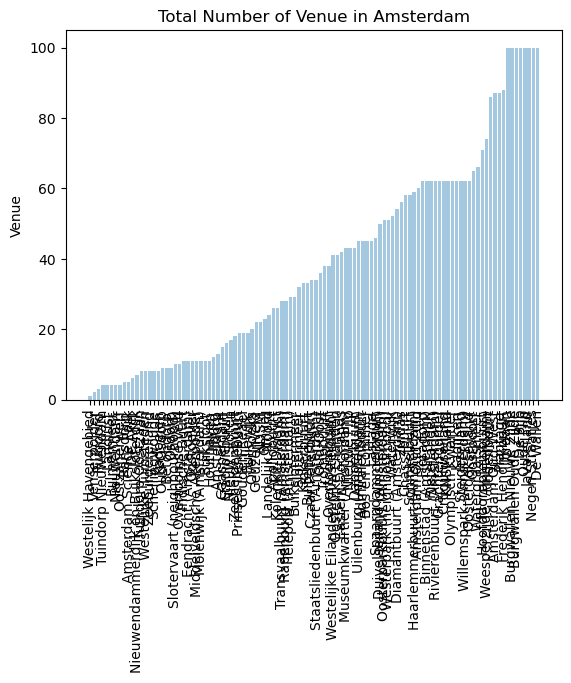

In [137]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = summary.Neighborhood
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venue in Amsterdam')
plt.xticks(rotation=90)

plt.show()

### Analyze Each Neighborhood

In [138]:
# one hot encoding
a_onehot = pd.get_dummies(a_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
a_onehot['Neighborhood'] = a_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [a_onehot.columns[-1]] + list(a_onehot.columns[:-1])
a_onehot = a_onehot[fixed_columns]

a_onehot.head()

,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Baseball Field,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cruise Ship,Cycle Studio,Dairy Store,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fraternity House,French Restaurant,Fried Chicken Joint,Friterie,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lawyer,Lebanese Restaurant,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nature Preserve,Neighborhood,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Sports Club,Squash Court,Stables,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,VR Caf

In [139]:
a_onehot.shape

(4112, 294)

In [140]:
# group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
a_grouped = a_onehot.groupby('Neighborhood').mean().reset_index()
a_grouped

,Neighborhood,Zoo Exhibit,Accessories Store,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Austrian Restaurant,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bar,Baseball Field,Bath House,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Boxing Gym,Brasserie,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Cafeteria,Café,Camera Store,Canal,Canal Lock,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Casino,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Cigkofte Place,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Comfort Food Restaurant,Comic Shop,Community Center,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cruise Ship,Cycle Studio,Dairy Store,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fraternity House,French Restaurant,Fried Chicken Joint,Friterie,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lawyer,Lebanese Restaurant,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nature Preserve,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Performing Arts Venue,Peruvian Restaurant,Pet Café,Pet Store,Pharmacy,Pier,Pilates Studio,Pizza Place,Planetarium,Playground,Plaza,Pool,Pool Hall,Pop-Up Shop,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Road,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Repair,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Spanish Restaurant,Spiritual Center,Sporting Goods Shop,Sports Club,Squash Court,Stables,Stadium,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Swiss Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,Track,Train Station,Tram Station,Turkish Restaurant,Udon Restaurant,VR Caf

In [141]:
a_grouped.shape

(106, 294)

In [142]:
num_top_venues = 5

for hood in a_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = a_grouped[a_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Admiralenbuurt----
         venue  freq
0   Restaurant  0.07
1  Coffee Shop  0.04
2  Supermarket  0.04
3  Snack Place  0.04
4          Bar  0.04


----Amsteldorp----
                    venue  freq
0  Furniture / Home Store  0.15
1               Brasserie  0.08
2            Cocktail Bar  0.08
3             Sports Club  0.08
4       French Restaurant  0.08


----Amsterdam Oud-West----
                venue  freq
0                Café  0.09
1         Coffee Shop  0.06
2          Restaurant  0.05
3  Italian Restaurant  0.05
4                 Bar  0.03


----Amsterdam Oud-Zuid----
        venue  freq
0  Restaurant  0.13
1       Hotel  0.10
2         Bar  0.07
3       Plaza  0.05
4      Bakery  0.05


----Amsterdam Science Park----
               venue  freq
0           Bus Stop   0.4
1  Convenience Store   0.2
2         Restaurant   0.2
3        Coffee Shop   0.2
4       Optical Shop   0.0


----Apollobuurt----
                venue  freq
0               Hotel  0.12
1     Organic Groce

             venue  freq
0  Harbor / Marina  0.14
1             Park  0.14
2       Smoke Shop  0.14
3            Plaza  0.14
4      Snack Place  0.14


----Olympisch Kwartier----
            venue  freq
0             Bar  0.11
1      Restaurant  0.06
2          Hostel  0.06
3           Hotel  0.06
4  Breakfast Spot  0.05


----Omval----
                venue  freq
0  Italian Restaurant  0.13
1           Cafeteria  0.09
2                Café  0.09
3         Coffee Shop  0.09
4      Breakfast Spot  0.04


----Oostelijke Eilanden----
                  venue  freq
0            Restaurant  0.12
1                  Café  0.07
2    Italian Restaurant  0.05
3         Deli / Bodega  0.05
4  Gym / Fitness Center  0.05


----Oosterdokseiland----
            venue  freq
0             Bar  0.11
1      Restaurant  0.06
2          Hostel  0.06
3           Hotel  0.06
4  Breakfast Spot  0.05


----Oosterparkbuurt (Amsterdam)----
                venue  freq
0         Coffee Shop  0.08
1  Turkish Restaur

4  Dutch Restaurant  0.12


----Westerpark (neighbourhood)----
         venue  freq
0   Restaurant  0.08
1  Coffee Shop  0.08
2         Café  0.06
3       Bakery  0.04
4  Pizza Place  0.04


----Willemspark (Amsterdam)----
                venue  freq
0               Hotel  0.11
1  Italian Restaurant  0.08
2                Café  0.06
3          Restaurant  0.06
4    Tapas Restaurant  0.03


----Zeeburgereiland----
             venue  freq
0     Tram Station  0.25
1  Harbor / Marina  0.12
2         Bus Stop  0.12
3       Restaurant  0.12
4      Supermarket  0.12


----Zeeheldenbuurt----
                    venue  freq
0  Furniture / Home Store  0.11
1                     Bar  0.06
2             Coffee Shop  0.06
3       Electronics Store  0.06
4                  Bakery  0.06


----Zuidas----
                venue  freq
0         Coffee Shop  0.09
1          Restaurant  0.07
2    Sushi Restaurant  0.05
3                 Gym  0.05
4  Italian Restaurant  0.05




In [143]:
# write a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [144]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = a_grouped['Neighborhood']

for ind in np.arange(a_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(a_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Admiralenbuurt,Restaurant,Snack Place,Café,Bar,Coffee Shop,Deli / Bodega,Supermarket,Plaza,Pet Café,Scandinavian Restaurant
1,Amsteldorp,Furniture / Home Store,Sports Club,Indoor Play Area,Dutch Restaurant,Café,French Restaurant,Gastropub,Park,Italian Restaurant,Brasserie
2,Amsterdam Oud-West,Café,Coffee Shop,Restaurant,Italian Restaurant,Bar,Pizza Place,Indonesian Restaurant,Movie Theater,Drugstore,Mediterranean Restaurant
3,Amsterdam Oud-Zuid,Restaurant,Hotel,Bar,Bakery,Plaza,Juice Bar,French Restaurant,Tram Station,Concert Hall,Spa
4,Amsterdam Science Park,Bus Stop,Coffee Shop,Convenience Store,Restaurant,Zoo,Empanada Restaurant,Dog Run,Doner Restaurant,Drugstore,Dutch Restaurant


### Cluster Neighborhoods

In [145]:
# set number of clusters
kclusters = 10

a_grouped_clustering = a_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(a_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([6, 6, 6, 6, 3, 6, 1, 1, 9, 6])

In [146]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

a_merged = adf

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
a_merged = a_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

a_merged.head() # check the last columns!

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Admiralenbuurt,52.372752,4.856359,6,Restaurant,Snack Place,Café,Bar,Coffee Shop,Deli / Bodega,Supermarket,Plaza,Pet Café,Scandinavian Restaurant
1,Amsteldorp,52.339680,4.918740,6,Furniture / Home Store,Sports Club,Indoor Play Area,Dutch Restaurant,Café,French Restaurant,Gastropub,Park,Italian Restaurant,Brasserie
2,Amsterdam Oud-West,52.365390,4.870220,6,Café,Coffee Shop,Restaurant,Italian Restaurant,Bar,Pizza Place,Indonesian Restaurant,Movie Theater,Drugstore,Mediterranean Restaurant
3,Amsterdam Oud-Zuid,52.352350,4.877880,6,Restaurant,Hotel,Bar,Bakery,Plaza,Juice Bar,French Restaurant,Tram Station,Concert Hall,Spa
4,Amsterdam Science Park,52.354300,4.958010,3,Bus Stop,Coffee Shop,Convenience Store,Restaurant,Zoo,Empanada Restaurant,Dog Run,Doner Restaurant,Drugstore,Dutch Restaurant


In [147]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(a_merged['Latitude'], a_merged['Longitude'], a_merged['Neighborhood'], a_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

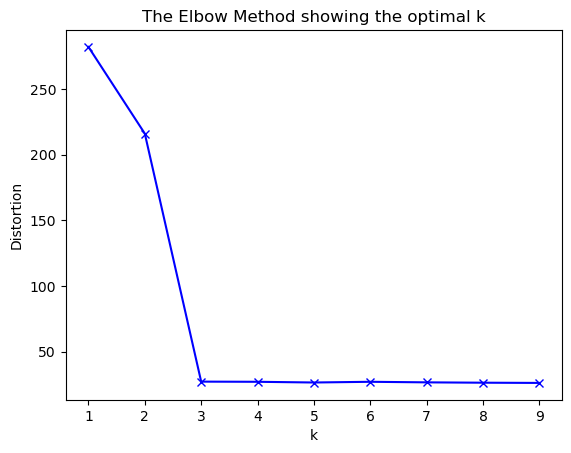

In [148]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(a_grouped_clustering)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(a_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / a_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Examine Clusters

In [157]:
# cluster 1
a_merged.loc[a_merged['Cluster Labels'] == 0, a_merged.columns[[0] + list(range(5, a_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
65,Oostzanerwerf,Flower Shop,Supermarket,Pier,Zoo,Dog Run,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store
100,Westelijke Tuinsteden,Spa,Hotel,Flower Shop,Pier,Bakery,Grocery Store,Dutch Restaurant,Electronics Store,Dive Bar


In [150]:
# cluster 2
a_merged.loc[a_merged['Cluster Labels'] == 1, a_merged.columns[[0] + list(range(5, a_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Betondorp,Market,Seafood Restaurant,Museum,Historic Site,Art Gallery,Dutch Restaurant,Electronics Store,Dive Bar,Dog Run
7,Bijlmermeer,Farm,Track,Park,Empanada Restaurant,Dog Run,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store
10,Buiksloot,Park,Restaurant,Café,Shopping Mall,Drugstore,Supermarket,Turkish Restaurant,Bakery,Dog Run
11,Buikslotermeer,Sandwich Place,Clothing Store,Electronics Store,Snack Place,Shopping Mall,Diner,Seafood Restaurant,Bakery,Market
26,Eendracht (Amsterdam),Garden,Athletics & Sports,Baseball Field,Event Space,Stadium,Snack Place,Cafeteria,General Entertainment,Bus Stop
29,Gaasperdam,Bakery,Optical Shop,Shoe Repair,Market,Shopping Mall,Gas Station,Supermarket,Chinese Restaurant,Asian Restaurant
31,Gouden Reael,Bakery,Playground,Metro Station,Supermarket,Shop & Service,Drugstore,French Restaurant,Indonesian Restaurant,Nature Preserve
37,Indische Buurt,Bath House,Convenience Store,Flea Market,Diner,Ice Cream Shop,Video Store,Market,Indonesian Restaurant,Grocery Store
42,Kadoelen,Grocery Store,Boat or Ferry,Road,Harbor / Marina,Bakery,Stables,Exhibit,Event Space,Event Service
45,Kolenkit District,Supermarket,Turkish Restaurant,Fast Food Restaurant,Field,Burger Joint,Korean Restaurant,Mediterranean Restaurant,Fish Market,Metro Station


In [151]:
# cluster 3
a_merged.loc[a_merged['Cluster Labels'] == 2, a_merged.columns[[0] + list(range(5, a_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
98,Westelijk Havengebied,Zoo,Event Service,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space


In [152]:
# cluster 4
a_merged.loc[a_merged['Cluster Labels'] == 3, a_merged.columns[[0] + list(range(5, a_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Amsterdam Science Park,Coffee Shop,Convenience Store,Restaurant,Zoo,Empanada Restaurant,Dog Run,Doner Restaurant,Drugstore,Dutch Restaurant
50,Molenwijk (Amsterdam),Supermarket,Furniture / Home Store,Bookstore,Shopping Mall,Pharmacy,Electronics Store,Dog Run,Doner Restaurant,Drugstore


In [153]:
# cluster 5
a_merged.loc[a_merged['Cluster Labels'] == 4, a_merged.columns[[0] + list(range(5, a_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
79,Ruigoord,Bar,Zoo,Ethiopian Restaurant,Dog Run,Doner Restaurant,Drugstore,Dutch Restaurant,Electronics Store,Empanada Restaurant


In [154]:
# cluster 6
a_merged.loc[a_merged['Cluster Labels'] == 5, a_merged.columns[[0] + list(range(5, a_merged.shape[1]))]]

,Neighborhood,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Admiralenbuurt,Snack Place,Café,Bar,Coffee Shop,Deli / Bodega,Supermarket,Plaza,Pet Café,Scandinavian Restaurant
1,Amsteldorp,Sports Club,Indoor Play Area,Dutch Restaurant,Café,French Restaurant,Gastropub,Park,Italian Restaurant,Brasserie
2,Amsterdam Oud-West,Coffee Shop,Restaurant,Italian Restaurant,Bar,Pizza Place,Indonesian Restaurant,Movie Theater,Drugstore,Mediterranean Restaurant
3,Amsterdam Oud-Zuid,Hotel,Bar,Bakery,Plaza,Juice Bar,French Restaurant,Tram Station,Concert Hall,Spa
5,Apollobuurt,Bakery,Bistro,Organic Grocery,Italian Restaurant,Indonesian Restaurant,Snack Place,Drugstore,Tapas Restaurant,Cheese Shop
9,Bos en Lommer,Bar,Coffee Shop,Pizza Place,Bakery,Vegetarian / Vegan Restaurant,Indonesian Restaurant,Turkish Restaurant,Mediterranean Restaurant,Food & Drink Shop
12,Buitenveldert,Drugstore,Sushi Restaurant,Coffee Shop,Hotel,Bakery,Restaurant,Liquor Store,Sandwich Place,Bistro
13,Bullewijk,Coffee Shop,Café,Furniture / Home Store,Restaurant,Scandinavian Restaurant,Brewery,Office,Cafeteria,Food & Drink Shop
14,Burgwallen Nieuwe Zijde,Bar,Hotel,Café,French Restaurant,Marijuana Dispensary,Church,Restaurant,Gift Shop,Bakery
15,Burgwallen Oude Zijde,Hotel,Coffee Shop,Sandwich Place,Clothing Store,Cosmetics Shop,Café,Chinese Restaurant,Brewery,Restaurant


Run to cluster 5 would be stop since k=6 with many locations to be shown, it would bother our selection of location to start business